In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [71]:
# 1. Loading the data into the data frame.
df = pd.read_csv("../initial_data/labels.csv")

In [72]:
df.head()

,id,model,type,brand,Style,year,Color,folder_size
0,2402544,Toyota Camry,Camry,Toyota,Sedan,2004,Black,450.750977
1,2460326,Toyota Camry,Camry,Toyota,Sedan,2012,White,820.288086
2,2328424,Toyota Camry,Camry,Toyota,Sedan,2013,Gray,1090.664062
3,2358214,Toyota Camry,Camry,Toyota,Sedan,2008,White,942.509766
4,2453232,Toyota Camry,Camry,Toyota,Sedan,2010,Silver,824.727539


In [73]:
# 2. Checking the types of data
df.dtypes

id               int64
model           object
type            object
brand           object
Style           object
year             int64
Color           object
folder_size    float64
dtype: object

In [74]:
# Dropping irrelevant columns

In [75]:
df.drop(["folder_size","id"], axis = 1, inplace=True)

In [76]:
df.head()

,model,type,brand,Style,year,Color
0,Toyota Camry,Camry,Toyota,Sedan,2004,Black
1,Toyota Camry,Camry,Toyota,Sedan,2012,White
2,Toyota Camry,Camry,Toyota,Sedan,2013,Gray
3,Toyota Camry,Camry,Toyota,Sedan,2008,White
4,Toyota Camry,Camry,Toyota,Sedan,2010,Silver


In [77]:
# Renaming the columns
df = df.rename(columns={"Style": "style", "Color": "color"})

**Dropping the duplicate rows**

In [78]:
df.shape

(560, 6)

In [79]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (38, 6)


In [80]:
df.count()

model    560
type     560
brand    560
style    553
year     560
color    560
dtype: int64

In [81]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,model,type,brand,style,year,color
0,Toyota Camry,Camry,Toyota,Sedan,2004,Black
1,Toyota Camry,Camry,Toyota,Sedan,2012,White
2,Toyota Camry,Camry,Toyota,Sedan,2013,Gray
3,Toyota Camry,Camry,Toyota,Sedan,2008,White
4,Toyota Camry,Camry,Toyota,Sedan,2010,Silver


In [82]:
df.count()

model    522
type     522
brand    522
style    515
year     522
color    522
dtype: int64

In [83]:
# Finding the null values.
print(df.isnull().sum())

model    0
type     0
brand    0
style    7
year     0
color    0
dtype: int64


In [84]:
# Dropping the missing values.
df = df.dropna() 
df.count()

model    515
type     515
brand    515
style    515
year     515
color    515
dtype: int64

<AxesSubplot:xlabel='count', ylabel='brand'>

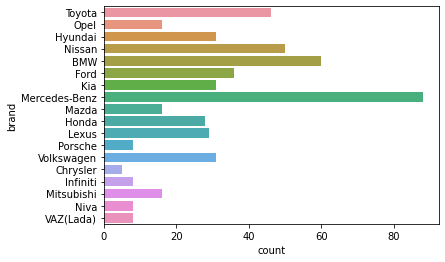

In [85]:
sns.countplot(y="brand", data=df)

<AxesSubplot:xlabel='count', ylabel='year'>

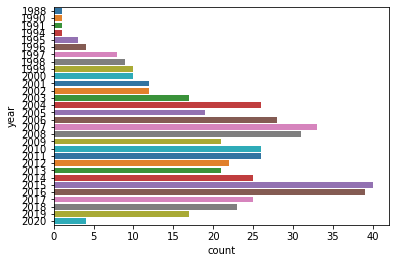

In [86]:
sns.countplot(y="year", data=df, palette="tab10")

<AxesSubplot:xlabel='count', ylabel='style'>

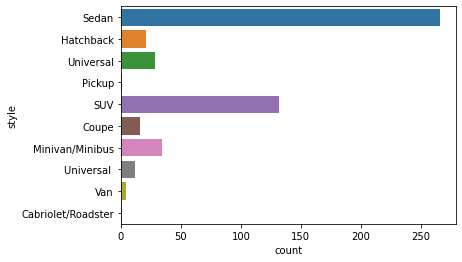

In [87]:
sns.countplot(y="style", data=df)

In [88]:
color_group = df.groupby("color")["model"].count()

In [89]:
color_group.head()

color
Azure      2
Beige      2
Black    133
Blue      34
Brown      2
Name: model, dtype: int64

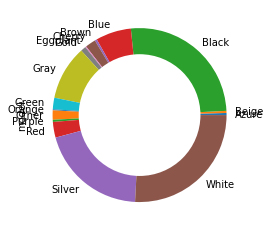

In [90]:
color_group.plot.pie(y = "Color", pctdistance=0)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [91]:
style_group = df.groupby("style")["model"].count()

In [92]:
df["style"].unique()

array(['Sedan', 'Hatchback', 'Universal', 'Pickup', 'SUV', 'Coupe',
       'Minivan/Minibus', 'Universal ', 'Van', 'Cabriolet/Roadster'],
      dtype=object)

<AxesSubplot:ylabel='model'>

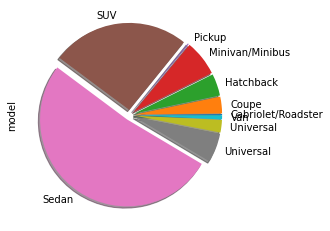

In [93]:
style_group.plot.pie(y = "style", explode=[0.06]*10, shadow=True)